In [1]:
%matplotlib inline

In [2]:
from fastai.collab import *
from fastai.tabular import *

In [4]:
path = Path("/datasets/fastai/movie_lens_sample")
path.ls()

[PosixPath('/datasets/fastai/movie_lens_sample/ratings.csv')]

In [5]:
ratings = pd.read_csv(path/"ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [6]:
series2cat?

In [7]:
ratings = ratings.astype({
    'userId': 'category',
    'movieId': 'category'
})

In [8]:
ratings.describe()

,rating,timestamp
count,6031.000000,6.031000e+03
mean,3.807826,1.127659e+09
std,0.961857,1.591801e+08
min,0.500000,8.538928e+08
25%,3.000000,9.764243e+08
50%,4.000000,1.111489e+09
75%,4.500000,1.232810e+09
max,5.000000,1.473804e+09


In [9]:
ratings.dtypes

userId       category
movieId      category
rating        float64
timestamp       int64
dtype: object

In [10]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [11]:
data.show_batch()

userId,movieId,target
232,1721,4.0
575,1136,5.0
199,4993,4.0
461,4226,4.5
77,316,4.0


In [12]:
y_range = [0., 5.]

In [14]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [15]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,2.364031,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


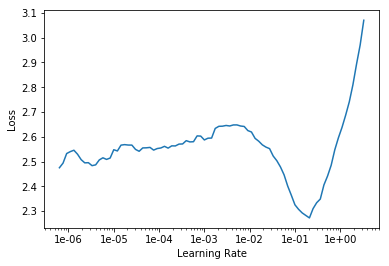

In [16]:
learn.recorder.plot()

In [17]:
learn.fit(2, 5e-3)

epoch,train_loss,valid_loss,time
0,1.514471,0.811600,00:01
1,0.814517,0.671549,00:01


## Running it on the 100k set

In [18]:
path100 = Path("/datasets/fastai/ml-100k")
path100.ls()

[PosixPath('/datasets/fastai/ml-100k/u4.test'),
 PosixPath('/datasets/fastai/ml-100k/u1.base'),
 PosixPath('/datasets/fastai/ml-100k/u4.base'),
 PosixPath('/datasets/fastai/ml-100k/u.info'),
 PosixPath('/datasets/fastai/ml-100k/u2.base'),
 PosixPath('/datasets/fastai/ml-100k/README'),
 PosixPath('/datasets/fastai/ml-100k/u.item'),
 PosixPath('/datasets/fastai/ml-100k/u.data'),
 PosixPath('/datasets/fastai/ml-100k/u5.test'),
 PosixPath('/datasets/fastai/ml-100k/u5.base'),
 PosixPath('/datasets/fastai/ml-100k/u.user'),
 PosixPath('/datasets/fastai/ml-100k/u1.test'),
 PosixPath('/datasets/fastai/ml-100k/u3.base'),
 PosixPath('/datasets/fastai/ml-100k/u.occupation'),
 PosixPath('/datasets/fastai/ml-100k/allbut.pl'),
 PosixPath('/datasets/fastai/ml-100k/ub.test'),
 PosixPath('/datasets/fastai/ml-100k/u.genre'),
 PosixPath('/datasets/fastai/ml-100k/ua.test'),
 PosixPath('/datasets/fastai/ml-100k/mku.sh'),
 PosixPath('/datasets/fastai/ml-100k/u3.test'),
 PosixPath('/datasets/fastai/ml-100k/ua

In [20]:
ratings = pd.read_csv(path100/'u.data', delimiter='\t', header=None,
                      names=['user','item','rating','timestamp'])
ratings.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [22]:
movies = pd.read_csv(path100/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=['item', 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,item,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
len(ratings)

100000

In [26]:
len(movies)

1682

In [27]:
rating_movie = ratings.merge(movies[['item', 'title']])
rating_movie.head()

,user,item,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [52]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.2, item_name='title')

In [53]:
data.show_batch()

user,title,target
303,Real Genius (1985),4.0
715,Akira (1988),4.0
94,While You Were Sleeping (1995),2.0
532,"Peacemaker, The (1997)",3.0
795,Mystery Science Theater 3000: The Movie (1996),3.0


In [31]:
y_range = [0., 5.0]

In [63]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-3)

In [64]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


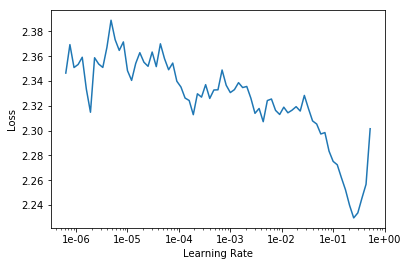

In [65]:
learn.recorder.plot(skip_end=15)

In [66]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.969527,0.974575,00:06
1,0.873432,0.881625,00:06
2,0.696774,0.854750,00:06
3,0.485248,0.860076,00:06
4,0.356289,0.864948,00:06


In [67]:
learn.save('dotprod')

## Preds

In [68]:
learn.load('dotprod');

In [69]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1639, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1639, 1)
)

In [70]:
g = rating_movie.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [72]:
movie_bias = learn.bias(top_movies, is_item=True)

In [73]:
movie_bias.shape

torch.Size([1000])

In [75]:
mean_ratings = rating_movie.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

### Hmm, looks like the model/embedding is wise enough to notice a bad movie

In [77]:
sorted(movie_ratings, key=lambda m_r: m_r[0])[:5]

[(tensor(-0.4644),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3823), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3414), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.3369), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3214),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142)]

### Lets see which movies it considers to be good

In [78]:
sorted(movie_ratings, key=lambda m_r: m_r[0], reverse=True)[:5]

[(tensor(0.8566), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.8521), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.8379), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.8132), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.8112), 'Silence of the Lambs, The (1991)', 4.28974358974359)]

In [80]:
mov_w = learn.weight(top_movies, is_item=True)
mov_w.shape

torch.Size([1000, 50])

### Reducing embedding dimensions to 2 for easier understanding of these values

In [82]:
mov_pca = mov_w.pca(3)
mov_pca.shape

torch.Size([1000, 3])

In [83]:
fac0, fac1, fac2 = mov_pca.t()
print(fac0.shape)

mov_f0 = [(f, title) for f, title in zip(fac0, top_movies)]

torch.Size([1000])


In [85]:
# Good movies based on fac0

sorted(mov_f0, key=lambda x: x[0], reverse=True)[:6]

[(tensor(1.6037), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.4697), 'Mr. Wrong (1996)'),
 (tensor(1.4214), "McHale's Navy (1997)"),
 (tensor(1.4114), 'Flipper (1996)'),
 (tensor(1.4059), 'Grease 2 (1982)'),
 (tensor(1.3963), 'Free Willy 3: The Rescue (1997)')]

In [86]:
# What about fac1?

mov_f1 = [(f, title) for f, title in zip(fac1, top_movies)]
sorted(mov_f1, key=lambda x: x[0], reverse=True)[:6]

[(tensor(1.5450), "It's a Wonderful Life (1946)"),
 (tensor(1.5412), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.4071), 'Braveheart (1995)'),
 (tensor(1.3003), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(1.2207), 'Affair to Remember, An (1957)'),
 (tensor(1.1089), 'Titanic (1997)')]

In [87]:
mov_f2 = [(f, title) for f, title in zip(fac2, top_movies)]
sorted(mov_f2, key=lambda x: x[0], reverse=True)[:6]

[(tensor(1.4572), 'Terminator, The (1984)'),
 (tensor(1.3771), 'Empire Strikes Back, The (1980)'),
 (tensor(1.2616), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.2175), 'Star Wars (1977)'),
 (tensor(1.1161), 'Beavis and Butt-head Do America (1996)'),
 (tensor(1.0711), 'Terminator 2: Judgment Day (1991)')]

### What do these factors really talk about?

- Short answer: we dont know how the model came up with these number but they tell you about a particular aspect of a movie. Which aspects? We don't know.

BUT, we can guess which aspects. fac0 seems to be targetting how funny a movie is, fac1 seems to be telling us how serious a movie is or is it a drama. fac2 is clearly showing how adventurous a movie is. Fascinating how a model learnt to do this just from mere user ratings.

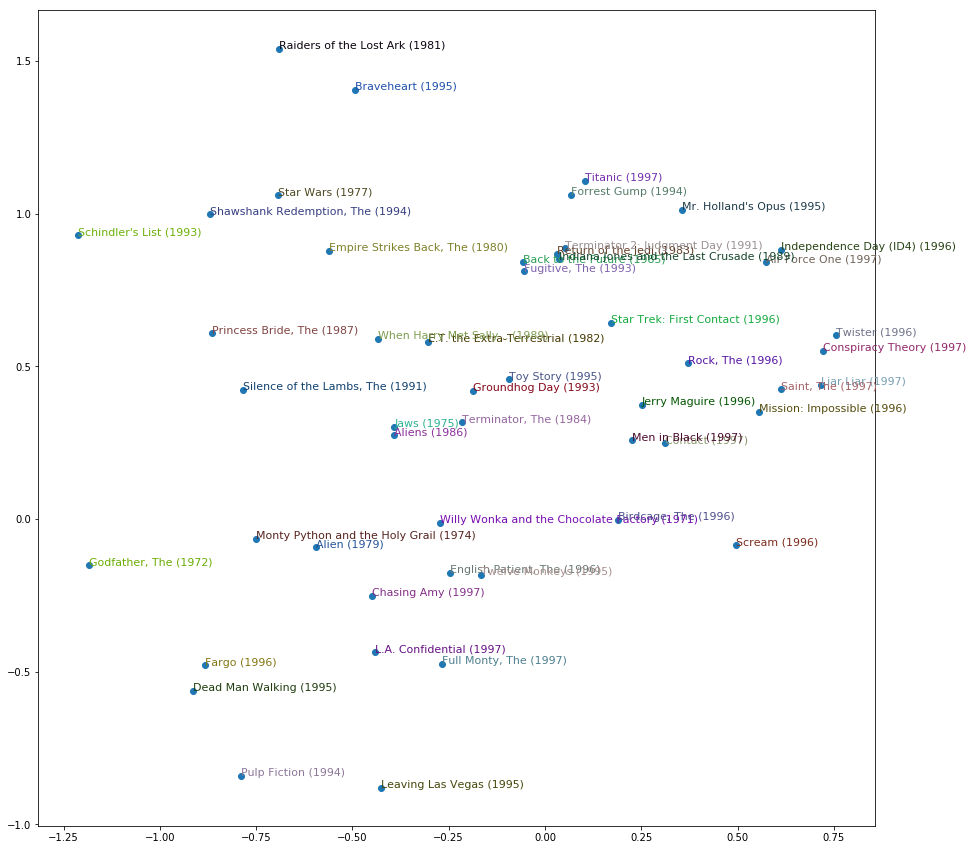

In [92]:
# Lets plot the movies on a grid, this will let us see how "similar" or "close" a movie is to another.
# Compressing embedding even further to just 2 parameters

plt_fac0, plt_fac1 = mov_w.pca(2).t()

idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = plt_fac0[idxs]
Y = plt_fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## fin.